In [ ]:
# default_exp utils

In [ ]:
#hide
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

# utils

> API details.

In [ ]:
#hide
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
#export
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
#export
def random_bbox(max_size=224):
    sep1 = random.randint(1, max_size-1)
    sep2 = random.randint(sep1, max_size)
    return torch.cat([
    torch.randint(low=0, high=sep1, size=(1,2)),
    torch.randint(low=sep1, high=sep2, size=(1,2))]).flatten()

In [ ]:
bbox = random_bbox()
print(bbox)

tensor([ 4, 32, 62, 91])


In [ ]:
#export
def visualize_bbox(img, bbox, class_name, color=(255, 0, 0) , thickness=2):
    """Visualizes a single bounding box on the image"""
    BOX_COLOR = (255, 0, 0) # Red
    TEXT_COLOR = (255, 255, 255) # White

    x_min, y_min, x_max, y_max = bbox

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

def visualize(image, bboxes, category_ids, category_id_to_name, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        if bbox != []:
            class_name = category_id_to_name[category_id]
            img = visualize_bbox(img, bbox, class_name)
    ax.axis('off')
    ax.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


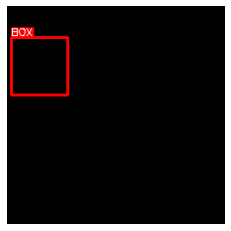

In [ ]:
visualize(
    np.zeros((224,224,3)),
    [bbox],
    [0],
    {0:'BOX'},
)